In [1]:
%load_ext autoreload
%autoreload 2
import os
import sys
import mne
import numpy as np
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    

In [2]:
from cerebra_atlas_python.cerebra import CerebrA, setup_logging
from cerebra_atlas_python.plotting import  plot_brain_slice_2D, get_cmap

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

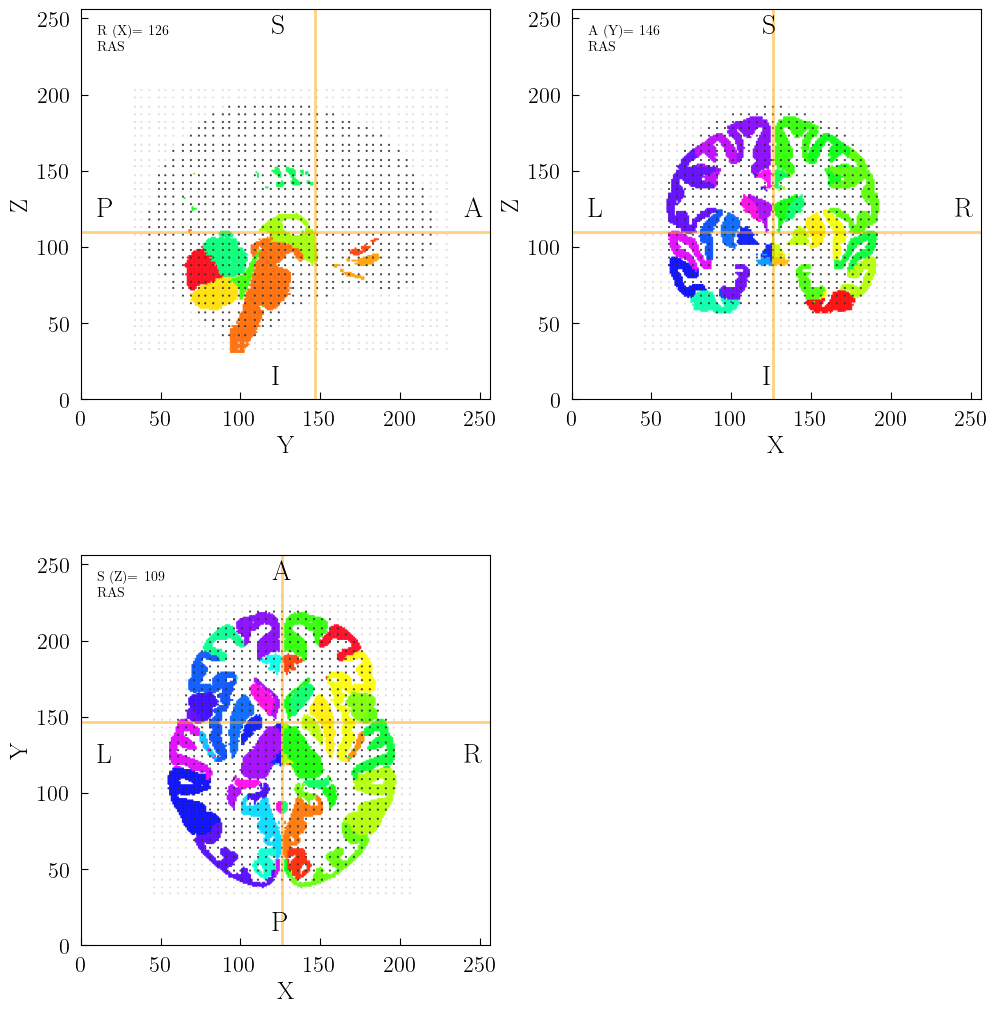

In [3]:
setup_logging(level="INFO")
cerebra = CerebrA()
cerebra.orthoview(plot_affine=True, plot_whitematter=False,plot_regions=True,plot_src_space=True)

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

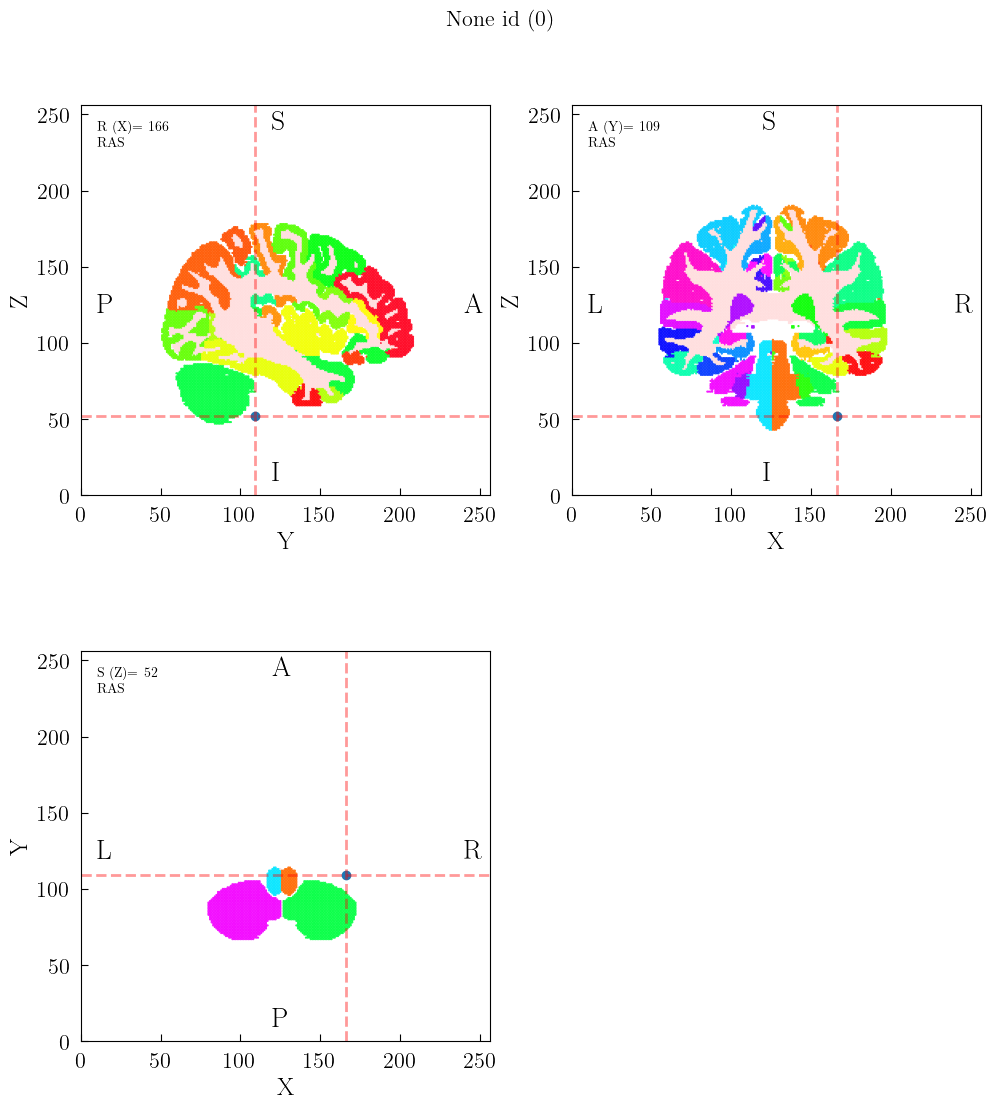

In [6]:
cerebra.orthoview(pt=[166, 109, 52],plot_regions=True, plot_whitematter=True)

In [21]:
cerebra.orthoview(pt=[120, 150, 190])

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

In [22]:
cerebra.get_closest_region_to_whitematter(pt=[120, 150, 190])

(True, array([115, 145, 185]), 89)

In [23]:
cerebra.orthoview(pt=[115, 145, 185])

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

In [24]:
%matplotlib qt

In [25]:
cerebra.orthoview(pt=cerebra.voxel_to_ras([50, -77, 3]))
pass

In [26]:
cerebra.plot_region_orthoview(region_id=29)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [51]:
cerebra.orthoview(cmap_name="gray")

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

In [ ]:
cerebra.plot_region_orthoview(region_id=89)

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

In [ ]:
cerebra.plot_region_orthoview(region_id=89-51)

array([[<Axes: xlabel='Y', ylabel='Z'>, <Axes: xlabel='X', ylabel='Z'>],
       [<Axes: xlabel='X', ylabel='Y'>, <Axes: >]], dtype=object)

In [8]:
%matplotlib qt
cerebra.plot_3d(alpha=0.1)

restart


(<Figure size 640x480 with 1 Axes>,
 <Axes3D: xlabel='X (R)', ylabel='Y (A)', zlabel='Z (S)'>)

In [9]:
cerebra.plot_whitematter_3d(alpha=0.05)

restart


In [54]:
1+1

2